<a href="https://colab.research.google.com/github/SanjeeveRM/Image-segregation-based-on-Crack-Width/blob/main/Crack_Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author : Sanjeeve Raveenthiran Mallichetty
# Email : rm.sanjeeve@gmail.com
import numpy as np
import glob
import time
import matplotlib
import matplotlib.pyplot as plt
import cv2
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from skimage.data import page
from skimage.filters import (threshold_sauvola)
from PIL import Image
from scipy import ndimage
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/CRACKED.zip

Archive:  /content/drive/MyDrive/CRACKED.zip
   creating: CRACKED IMGS/
  inflating: CRACKED IMGS/00001.jpg  
  inflating: CRACKED IMGS/00002.jpg  
  inflating: CRACKED IMGS/00003.jpg  
  inflating: CRACKED IMGS/00004.jpg  
  inflating: CRACKED IMGS/00005.jpg  
  inflating: CRACKED IMGS/00006.jpg  
  inflating: CRACKED IMGS/00007.jpg  
  inflating: CRACKED IMGS/00008.jpg  
  inflating: CRACKED IMGS/00009.jpg  
  inflating: CRACKED IMGS/00010.jpg  
  inflating: CRACKED IMGS/00011.jpg  
  inflating: CRACKED IMGS/00012.jpg  
  inflating: CRACKED IMGS/00013.jpg  
  inflating: CRACKED IMGS/00014.jpg  
  inflating: CRACKED IMGS/00015.jpg  
  inflating: CRACKED IMGS/00016.jpg  
  inflating: CRACKED IMGS/00017.jpg  
  inflating: CRACKED IMGS/00018.jpg  
  inflating: CRACKED IMGS/00019.jpg  
  inflating: CRACKED IMGS/00020.jpg  
  inflating: CRACKED IMGS/00021.jpg  
  inflating: CRACKED IMGS/00050.jpg  
  inflating: CRACKED IMGS/00051.jpg  
  inflating: CRACKED IMGS/00052.jpg  
  inflating: CRA

In [ ]:
path = '/content/CRACKED IMGS/*.*'  
img_number = 1
sauvola_frames_Pw_bw = []
sauvola_frames_Pw = []

for file in glob.glob(path):
    print(file)
    img = cv2.imread(file,0)
    dim = (300, 300)
    img_gray = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # window size'Concrete Crack Identification Using a UAV Incorporating Hybrid Image Processing' 
    
    # window size and k value were used without any changes from the
    window_size_Pw = 71
    thresh_sauvola_Pw = threshold_sauvola(img_gray, window_size=window_size_Pw, k=0.42)

    # Below are the converted images through Sauvola's method.
    # _bw will contain 0 or 1, not true or false. bw means black or white.
    binary_sauvola_Pw = img_gray > thresh_sauvola_Pw
    binary_sauvola_Pw_bw = img_gray > thresh_sauvola_Pw

    binary_sauvola_Pw_bw.dtype = 'uint8'

    binary_sauvola_Pw_bw *= 255
    
    # Image Binarization
    # The list which saves the images after image binarization.
    
    sauvola_frames_Pw_bw.append(binary_sauvola_Pw_bw)
    sauvola_frames_Pw.append(binary_sauvola_Pw)
    


/content/CRACKED IMGS/00068.jpg
/content/CRACKED IMGS/00095.jpg
/content/CRACKED IMGS/00016.jpg
/content/CRACKED IMGS/00020.jpg
/content/CRACKED IMGS/00012.jpg
/content/CRACKED IMGS/00019.jpg
/content/CRACKED IMGS/00065.jpg
/content/CRACKED IMGS/00004.jpg
/content/CRACKED IMGS/00077.jpg
/content/CRACKED IMGS/00062.jpg
/content/CRACKED IMGS/00007.jpg
/content/CRACKED IMGS/00063.jpg
/content/CRACKED IMGS/00080.jpg
/content/CRACKED IMGS/00071.jpg
/content/CRACKED IMGS/00060.jpg
/content/CRACKED IMGS/00051.jpg
/content/CRACKED IMGS/00091.jpg
/content/CRACKED IMGS/00009.jpg
/content/CRACKED IMGS/00092.jpg
/content/CRACKED IMGS/00098.jpg
/content/CRACKED IMGS/00069.jpg
/content/CRACKED IMGS/00003.jpg
/content/CRACKED IMGS/00076.jpg
/content/CRACKED IMGS/00074.jpg
/content/CRACKED IMGS/00082.jpg
/content/CRACKED IMGS/00066.jpg
/content/CRACKED IMGS/00073.jpg
/content/CRACKED IMGS/00093.jpg
/content/CRACKED IMGS/00014.jpg
/content/CRACKED IMGS/00070.jpg
/content/CRACKED IMGS/00050.jpg
/content

In [ ]:
from skimage.morphology import skeletonize
from skimage.util import invert

/content/CRACKED IMGS/00068.jpg


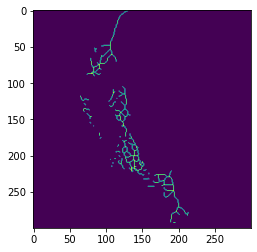

/content/CRACKED IMGS/00095.jpg


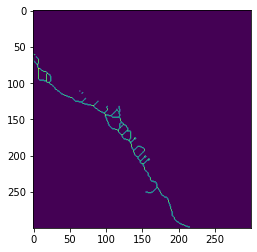

/content/CRACKED IMGS/00016.jpg


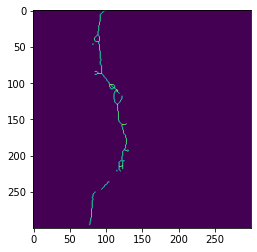

/content/CRACKED IMGS/00020.jpg


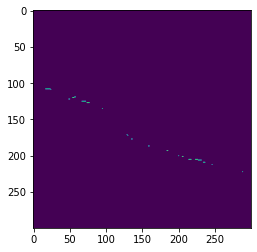

/content/CRACKED IMGS/00012.jpg


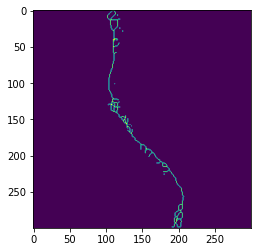

/content/CRACKED IMGS/00019.jpg


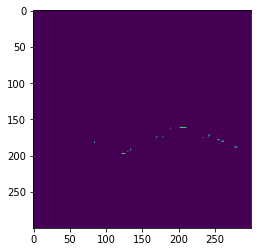

/content/CRACKED IMGS/00065.jpg


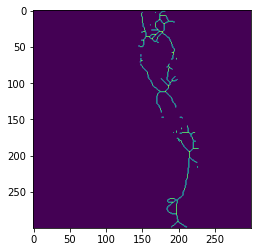

/content/CRACKED IMGS/00004.jpg


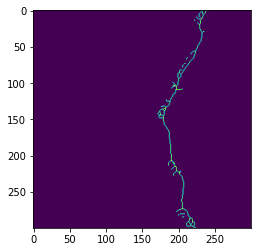

/content/CRACKED IMGS/00077.jpg


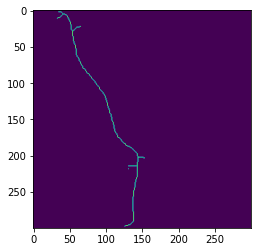

/content/CRACKED IMGS/00062.jpg


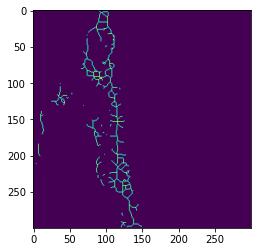

/content/CRACKED IMGS/00007.jpg


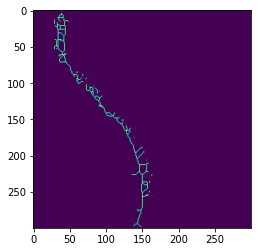

/content/CRACKED IMGS/00063.jpg


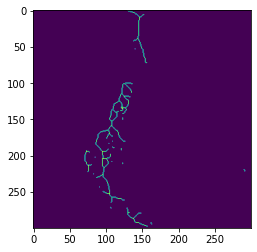

/content/CRACKED IMGS/00080.jpg


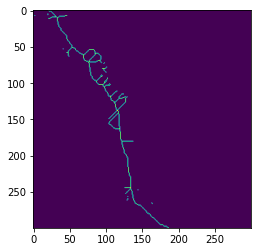

/content/CRACKED IMGS/00071.jpg


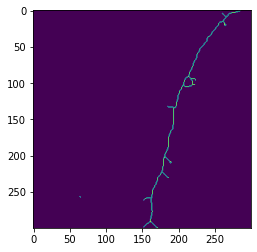

/content/CRACKED IMGS/00060.jpg


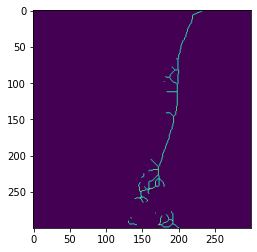

/content/CRACKED IMGS/00051.jpg


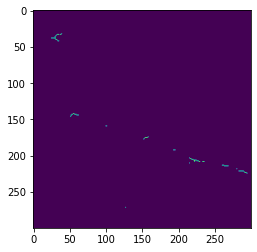

/content/CRACKED IMGS/00091.jpg


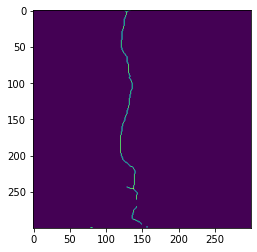

/content/CRACKED IMGS/00009.jpg


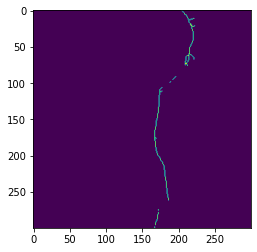

/content/CRACKED IMGS/00092.jpg


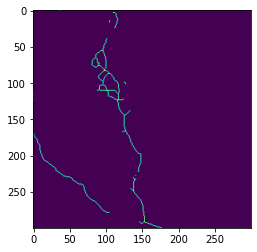

/content/CRACKED IMGS/00098.jpg


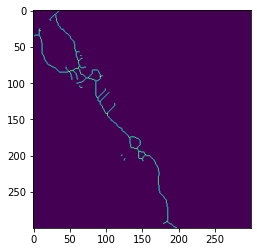

/content/CRACKED IMGS/00069.jpg


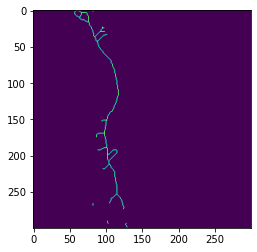

/content/CRACKED IMGS/00003.jpg


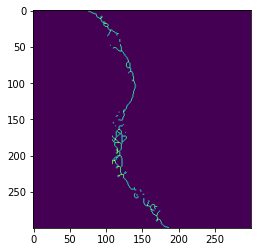

/content/CRACKED IMGS/00076.jpg


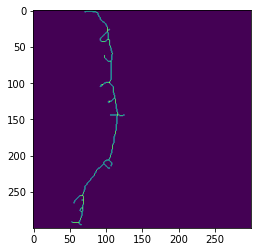

/content/CRACKED IMGS/00074.jpg


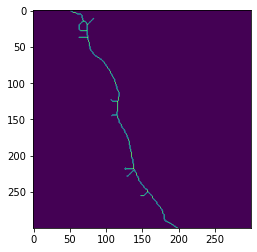

/content/CRACKED IMGS/00082.jpg


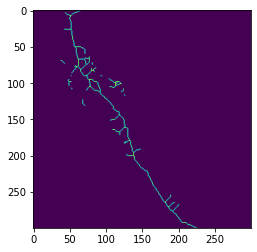

/content/CRACKED IMGS/00066.jpg


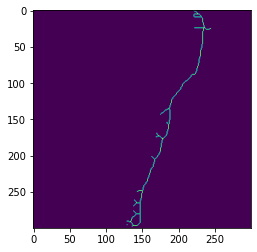

/content/CRACKED IMGS/00073.jpg


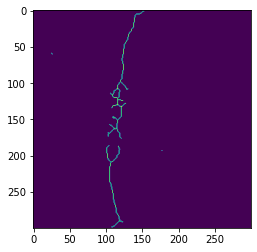

/content/CRACKED IMGS/00093.jpg


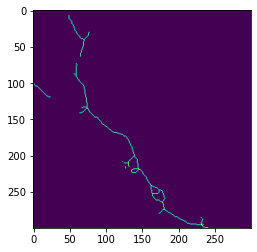

/content/CRACKED IMGS/00014.jpg


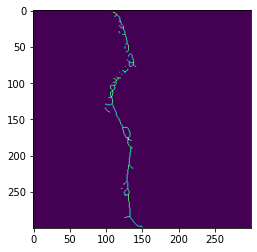

/content/CRACKED IMGS/00070.jpg


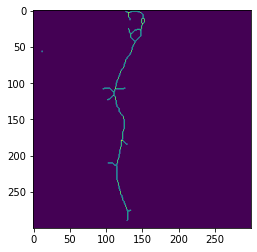

/content/CRACKED IMGS/00050.jpg


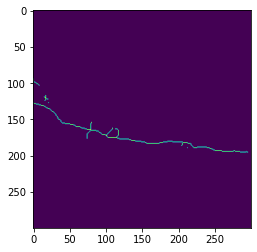

/content/CRACKED IMGS/00013.jpg


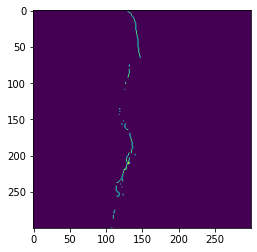

/content/CRACKED IMGS/00005.jpg


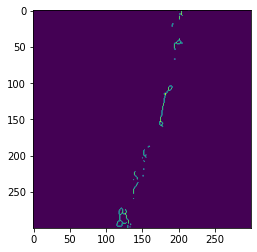

/content/CRACKED IMGS/00064.jpg


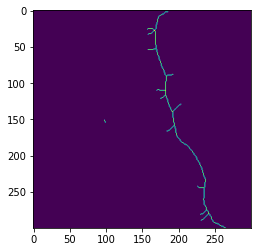

/content/CRACKED IMGS/00083.jpg


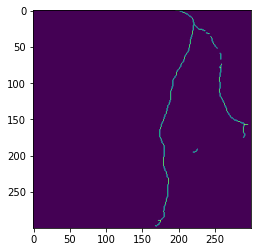

/content/CRACKED IMGS/00001.jpg


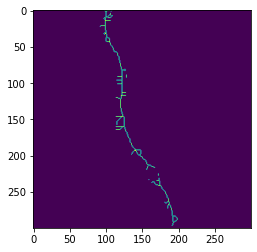

/content/CRACKED IMGS/00058.jpg


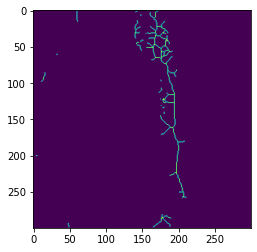

/content/CRACKED IMGS/00059.jpg


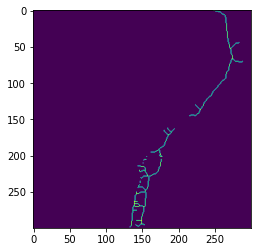

/content/CRACKED IMGS/00021.jpg


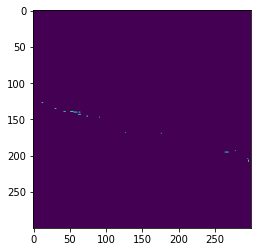

/content/CRACKED IMGS/00054.jpg


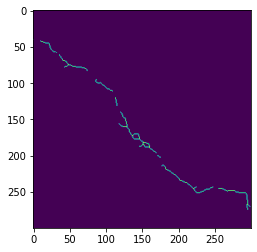

/content/CRACKED IMGS/00072.jpg


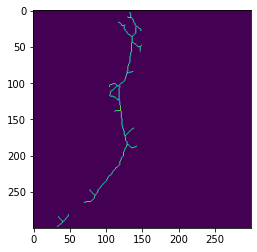

/content/CRACKED IMGS/00067.jpg


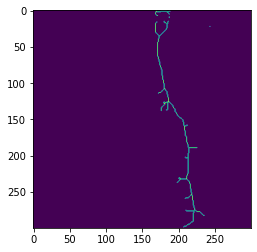

/content/CRACKED IMGS/00084.jpg


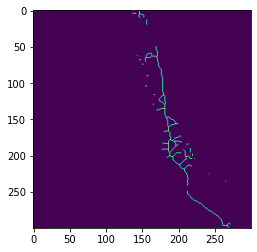

/content/CRACKED IMGS/00097.jpg


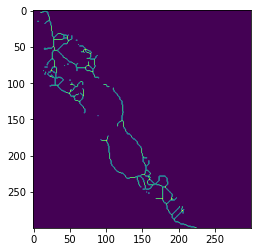

/content/CRACKED IMGS/00079.jpg


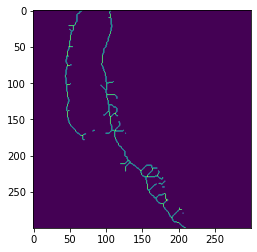

/content/CRACKED IMGS/00090.jpg


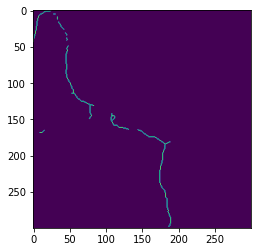

/content/CRACKED IMGS/00057.jpg


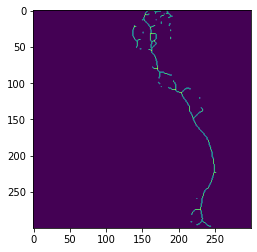

/content/CRACKED IMGS/00052.jpg


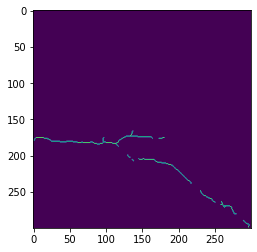

/content/CRACKED IMGS/00015.jpg


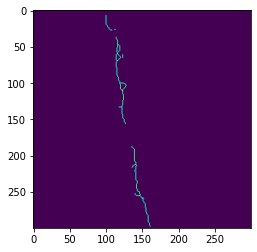

/content/CRACKED IMGS/00053.jpg


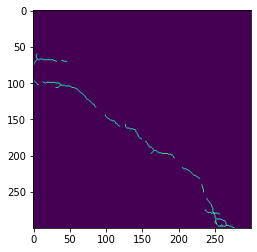

/content/CRACKED IMGS/00002.jpg


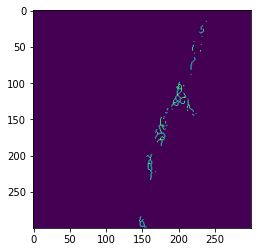

/content/CRACKED IMGS/00006.jpg


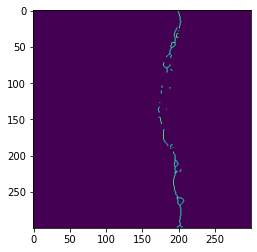

/content/CRACKED IMGS/00094.jpg


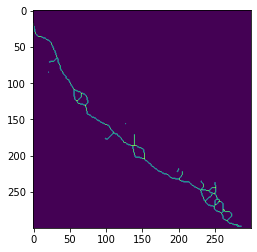

/content/CRACKED IMGS/00055.jpg


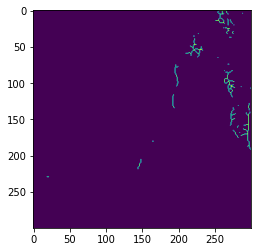

/content/CRACKED IMGS/00008.jpg


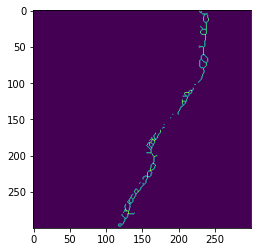

/content/CRACKED IMGS/00085.jpg


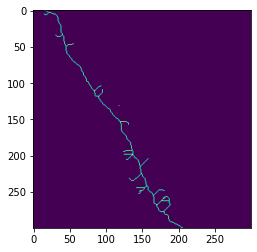

/content/CRACKED IMGS/00056.jpg


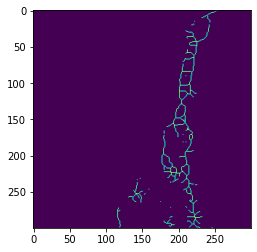

/content/CRACKED IMGS/00018.jpg


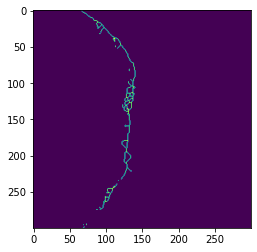

/content/CRACKED IMGS/00017.jpg


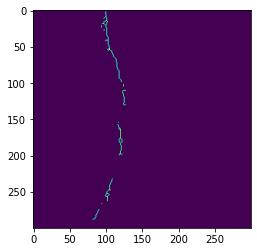

/content/CRACKED IMGS/00096.jpg


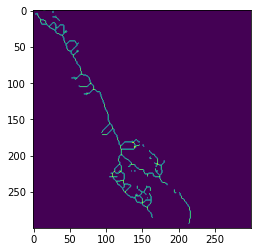

/content/CRACKED IMGS/00011.jpg


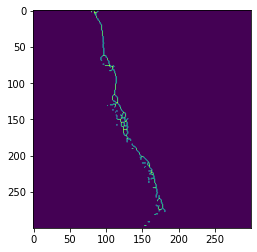

/content/CRACKED IMGS/00075.jpg


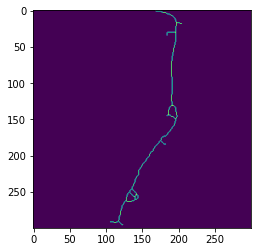

/content/CRACKED IMGS/00086.jpg


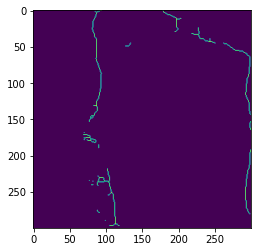

/content/CRACKED IMGS/00088.jpg


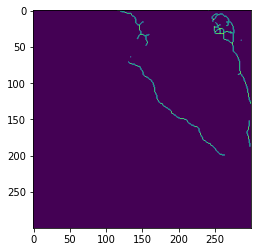

/content/CRACKED IMGS/00061.jpg


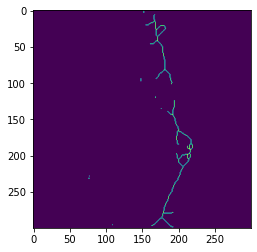

/content/CRACKED IMGS/00078.jpg


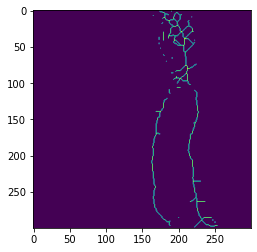

/content/CRACKED IMGS/00087.jpg


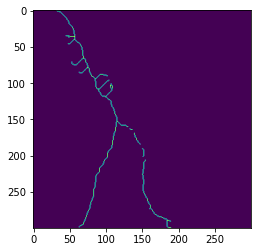

/content/CRACKED IMGS/00010.jpg


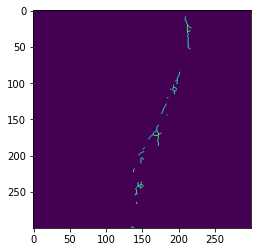

/content/CRACKED IMGS/00081.jpg


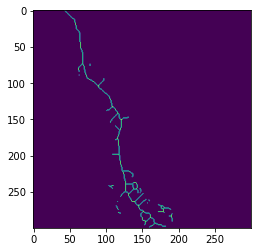

/content/CRACKED IMGS/00089.jpg


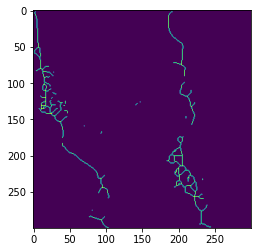

In [ ]:
skeleton_frames_Pw = []
i=0
im_list= []
for file in glob.glob(path):
    print(file)
    img_Pw = invert(sauvola_frames_Pw[i])
    #
    im=cv2.imread(file,1)
    im_list.append(im)
    #
    # Below are skeletonized images
    skeleton_Pw = skeletonize(img_Pw)

    # Convert true/false to 1/0 to save it as image
    skeleton_Pw.dtype = 'uint8'

    skeleton_Pw *= 255
    
    # Skeletonize
    # The list which saves the images after the skeletonization.
    skeleton_frames_Pw.append(skeleton_Pw)
    plt.imshow(skeleton_Pw)
    plt.show()
  
    i=i+1

In [ ]:
import numpy as np
from scipy import ndimage as ndi
from skimage import feature

/content/CRACKED IMGS/00068.jpg


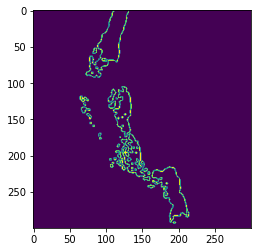

/content/CRACKED IMGS/00095.jpg


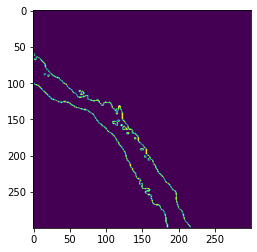

/content/CRACKED IMGS/00016.jpg


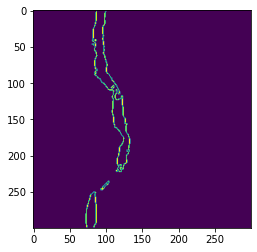

/content/CRACKED IMGS/00020.jpg


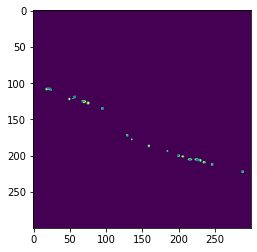

/content/CRACKED IMGS/00012.jpg


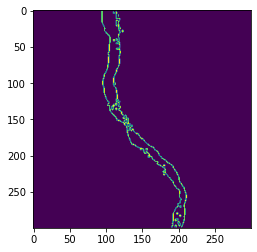

/content/CRACKED IMGS/00019.jpg


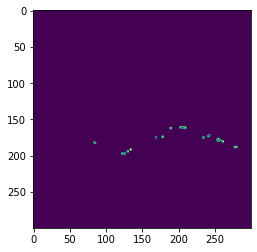

/content/CRACKED IMGS/00065.jpg


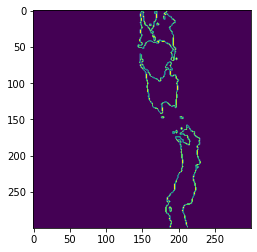

/content/CRACKED IMGS/00004.jpg


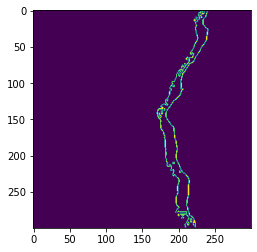

/content/CRACKED IMGS/00077.jpg


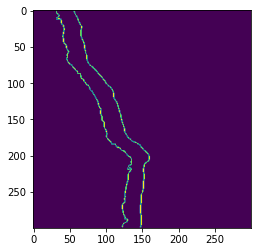

/content/CRACKED IMGS/00062.jpg


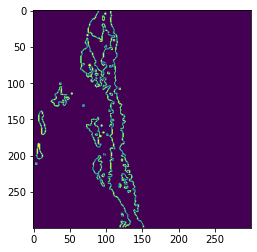

/content/CRACKED IMGS/00007.jpg


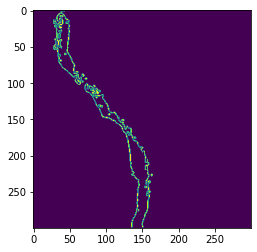

/content/CRACKED IMGS/00063.jpg


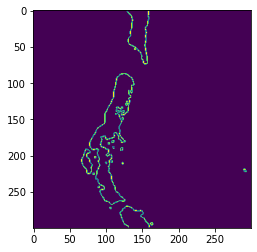

/content/CRACKED IMGS/00080.jpg


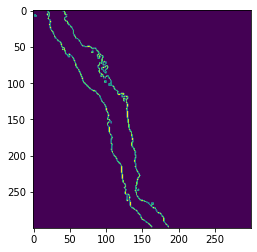

/content/CRACKED IMGS/00071.jpg


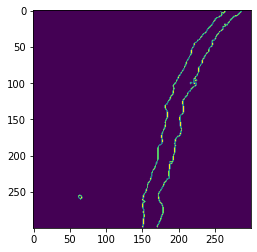

/content/CRACKED IMGS/00060.jpg


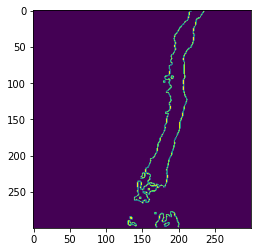

/content/CRACKED IMGS/00051.jpg


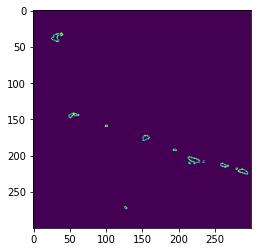

/content/CRACKED IMGS/00091.jpg


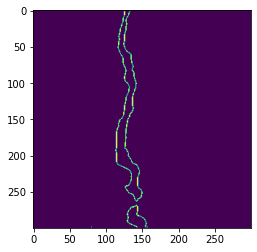

/content/CRACKED IMGS/00009.jpg


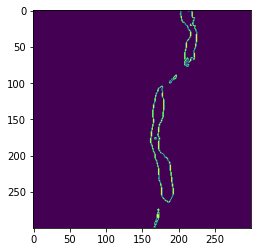

/content/CRACKED IMGS/00092.jpg


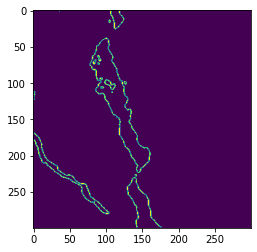

/content/CRACKED IMGS/00098.jpg


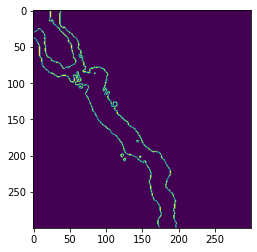

/content/CRACKED IMGS/00069.jpg


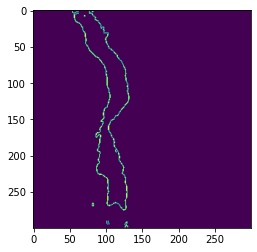

/content/CRACKED IMGS/00003.jpg


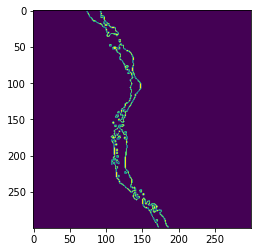

/content/CRACKED IMGS/00076.jpg


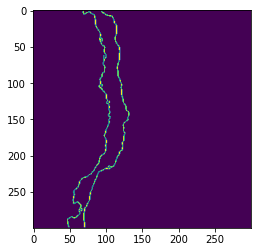

/content/CRACKED IMGS/00074.jpg


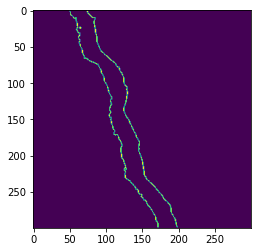

/content/CRACKED IMGS/00082.jpg


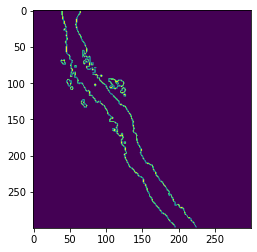

/content/CRACKED IMGS/00066.jpg


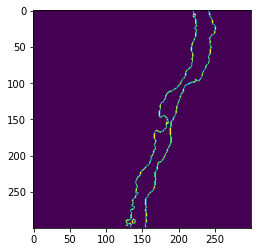

/content/CRACKED IMGS/00073.jpg


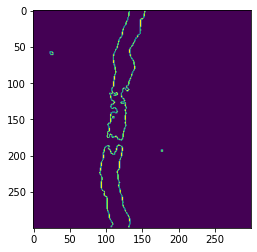

/content/CRACKED IMGS/00093.jpg


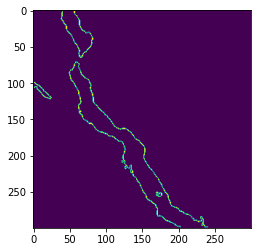

/content/CRACKED IMGS/00014.jpg


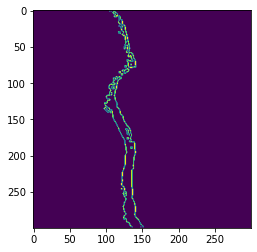

/content/CRACKED IMGS/00070.jpg


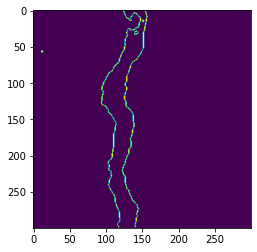

/content/CRACKED IMGS/00050.jpg


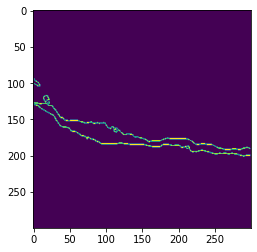

/content/CRACKED IMGS/00013.jpg


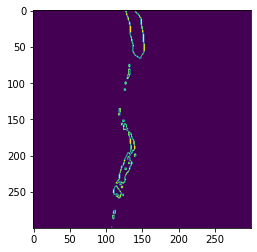

/content/CRACKED IMGS/00005.jpg


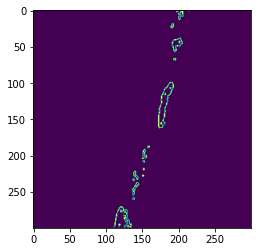

/content/CRACKED IMGS/00064.jpg


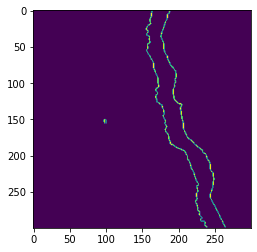

/content/CRACKED IMGS/00083.jpg


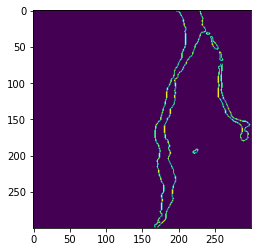

/content/CRACKED IMGS/00001.jpg


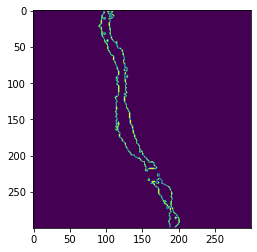

/content/CRACKED IMGS/00058.jpg


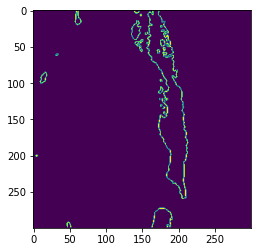

/content/CRACKED IMGS/00059.jpg


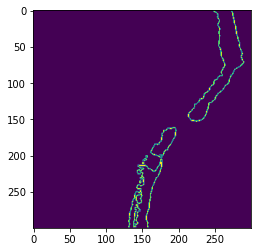

/content/CRACKED IMGS/00021.jpg


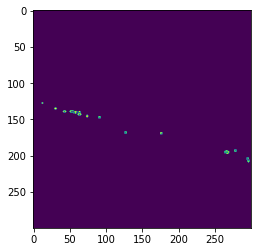

/content/CRACKED IMGS/00054.jpg


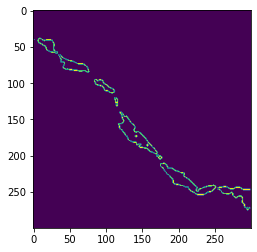

/content/CRACKED IMGS/00072.jpg


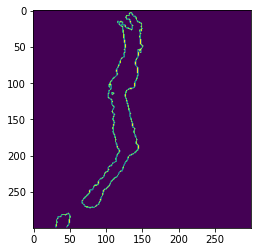

/content/CRACKED IMGS/00067.jpg


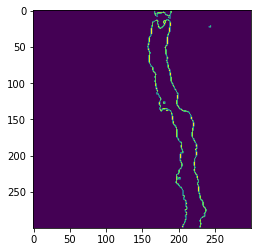

/content/CRACKED IMGS/00084.jpg


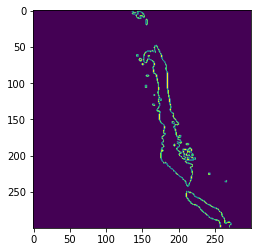

/content/CRACKED IMGS/00097.jpg


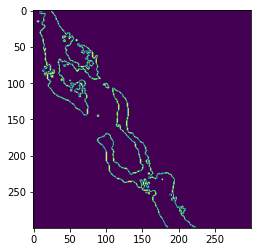

/content/CRACKED IMGS/00079.jpg


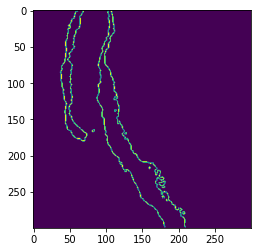

/content/CRACKED IMGS/00090.jpg


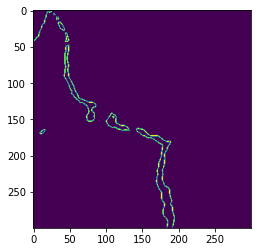

/content/CRACKED IMGS/00057.jpg


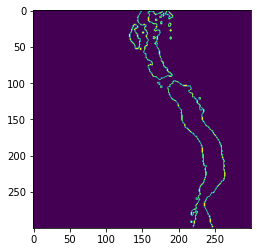

/content/CRACKED IMGS/00052.jpg


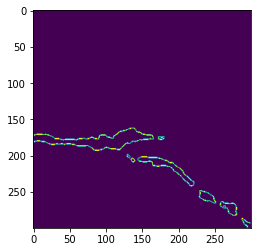

/content/CRACKED IMGS/00015.jpg


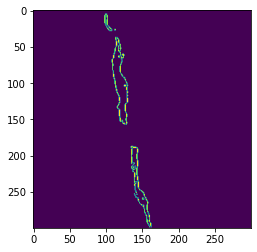

/content/CRACKED IMGS/00053.jpg


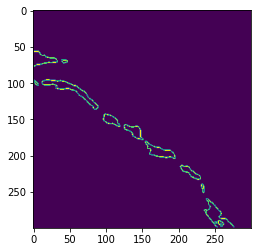

/content/CRACKED IMGS/00002.jpg


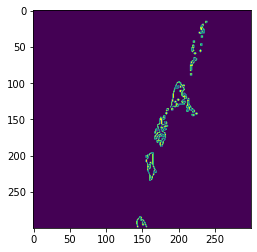

/content/CRACKED IMGS/00006.jpg


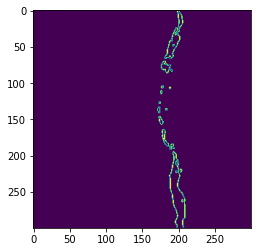

/content/CRACKED IMGS/00094.jpg


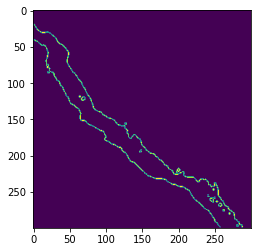

/content/CRACKED IMGS/00055.jpg


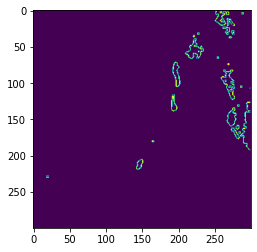

/content/CRACKED IMGS/00008.jpg


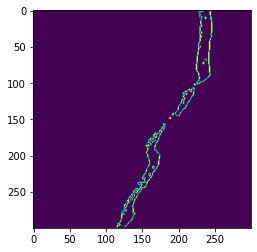

/content/CRACKED IMGS/00085.jpg


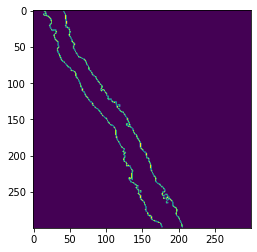

/content/CRACKED IMGS/00056.jpg


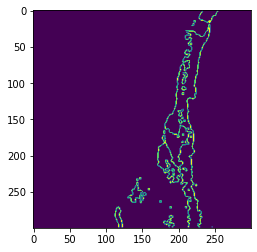

/content/CRACKED IMGS/00018.jpg


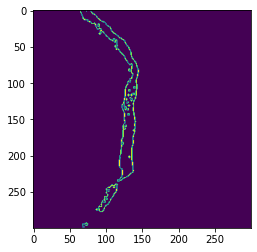

/content/CRACKED IMGS/00017.jpg


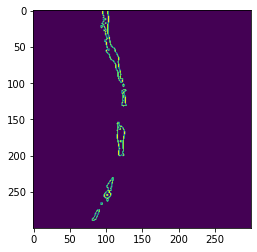

/content/CRACKED IMGS/00096.jpg


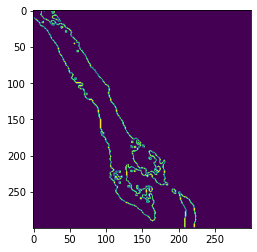

/content/CRACKED IMGS/00011.jpg


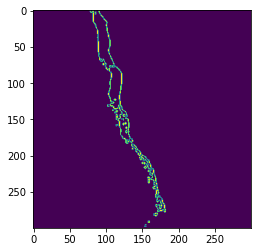

/content/CRACKED IMGS/00075.jpg


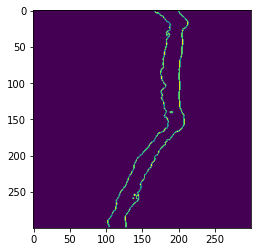

/content/CRACKED IMGS/00086.jpg


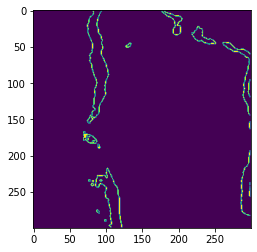

/content/CRACKED IMGS/00088.jpg


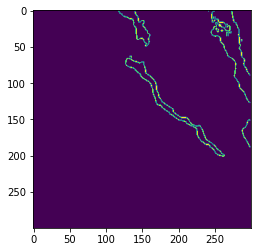

/content/CRACKED IMGS/00061.jpg


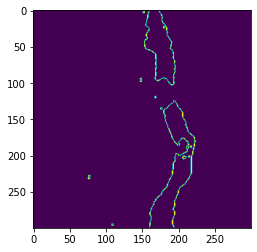

/content/CRACKED IMGS/00078.jpg


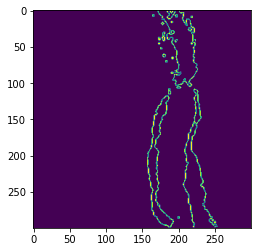

/content/CRACKED IMGS/00087.jpg


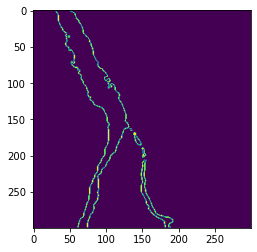

/content/CRACKED IMGS/00010.jpg


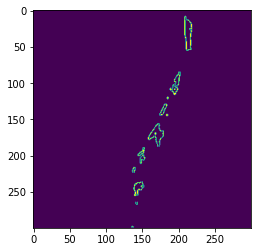

/content/CRACKED IMGS/00081.jpg


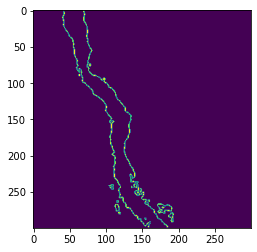

/content/CRACKED IMGS/00089.jpg


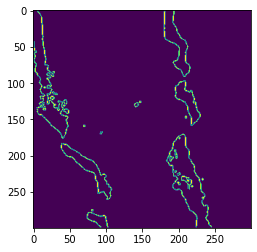

In [ ]:
edges_frames_Pw = []
i=0
for file in glob.glob(path):
    print(file)
     # Compute the Canny filter for two values of sigma
    # canny(image, sigma=1.0, low_threshold=None, high_threshold=None, mask=None, use_quantiles=False)
    edges_Pw = feature.canny(sauvola_frames_Pw[i], 0.09)

    edges_Pw.dtype = 'uint8'

    edges_Pw *= 255
    
    # The list which saves the images after edge detection.
    edges_frames_Pw.append(edges_Pw)
    plt.imshow(edges_Pw)
    plt.show()
    i=i+1

In [ ]:
import queue
import math

Crack Severity : High 



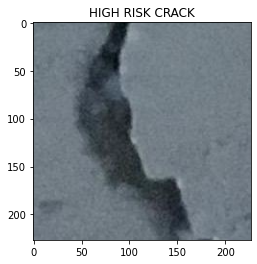

Crack Severity : High 



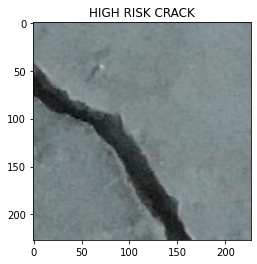

Crack Severity : High 



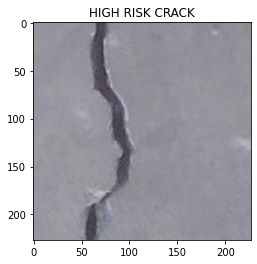

Crack Severity : Low 



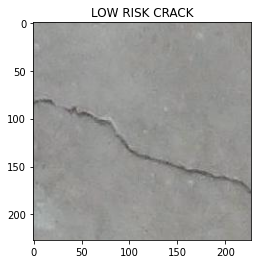

Crack Severity : High 



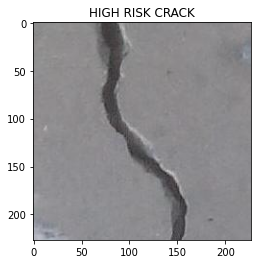

Crack Severity : Low 



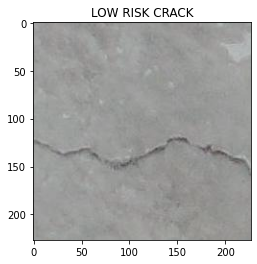

Crack Severity : High 



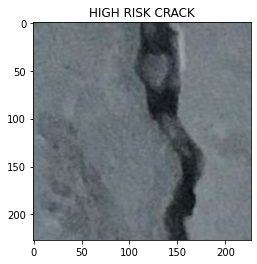

Crack Severity : High 



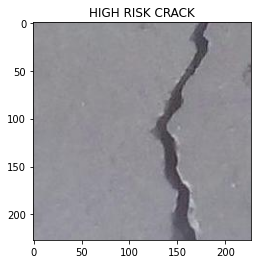

Crack Severity : High 



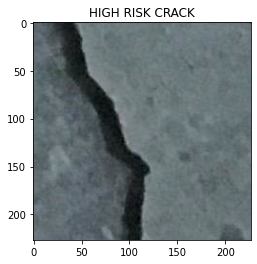

Crack Severity : High 



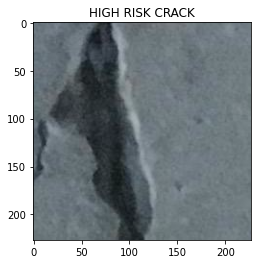

Crack Severity : High 



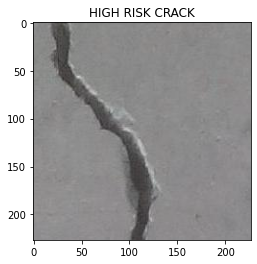

Crack Severity : High 



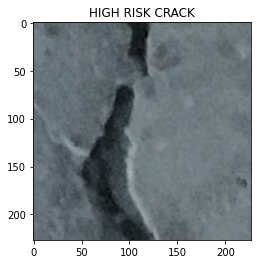

Crack Severity : High 



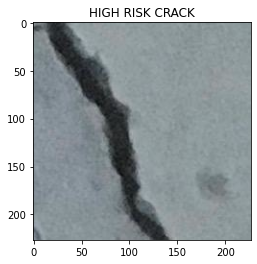

Crack Severity : High 



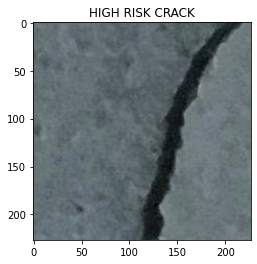

Crack Severity : High 



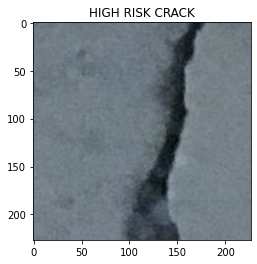

Crack Severity : Medium 



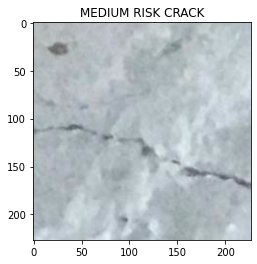

Crack Severity : High 



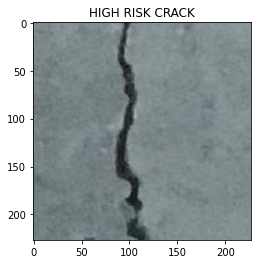

Crack Severity : High 



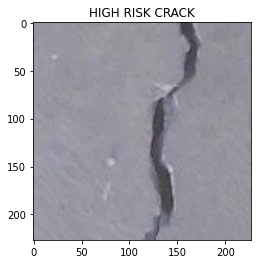

Crack Severity : High 



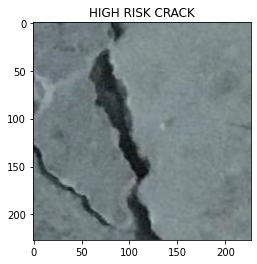

Crack Severity : High 



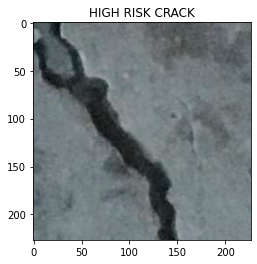

Crack Severity : High 



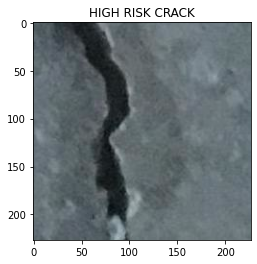

Crack Severity : High 



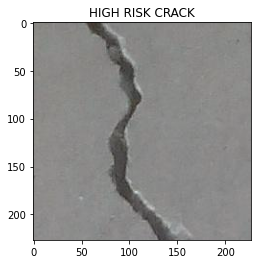

Crack Severity : High 



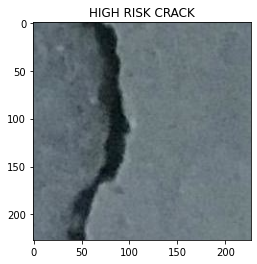

Crack Severity : High 



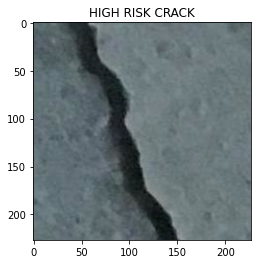

Crack Severity : High 



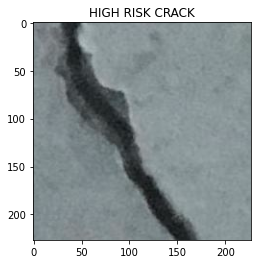

Crack Severity : High 



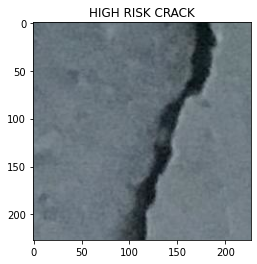

Crack Severity : High 



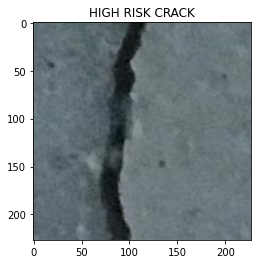

Crack Severity : High 



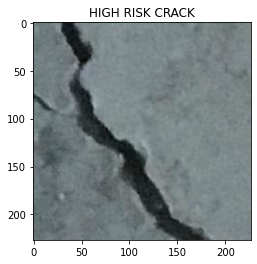

Crack Severity : High 



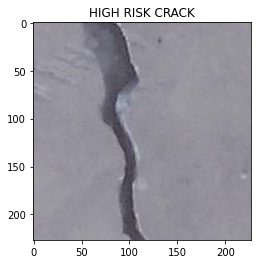

Crack Severity : High 



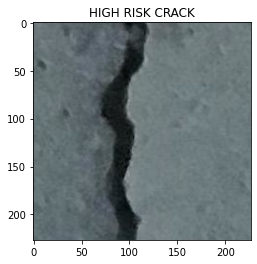

Crack Severity : High 



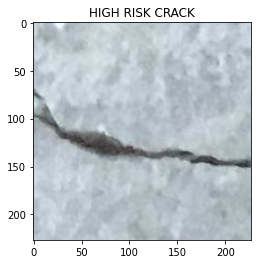

Crack Severity : High 



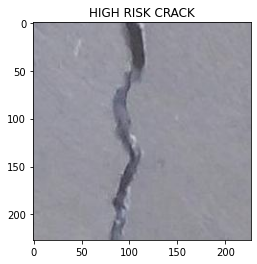

Crack Severity : High 



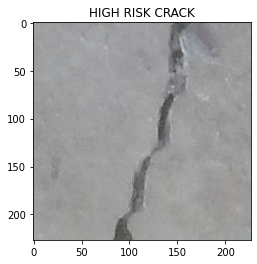

Crack Severity : High 



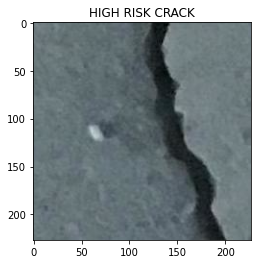

Crack Severity : High 



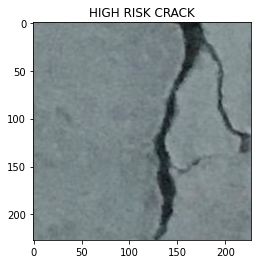

Crack Severity : High 



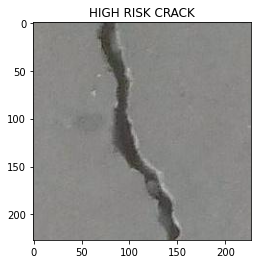

Crack Severity : High 



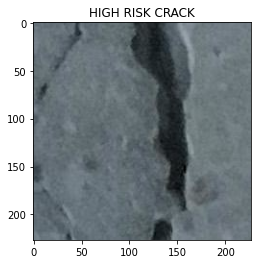

Crack Severity : High 



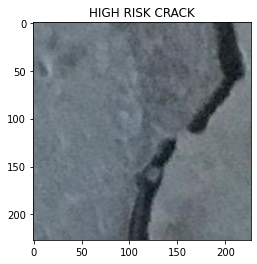

Crack Severity : Low 



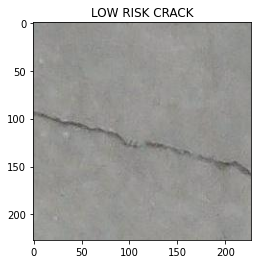

Crack Severity : High 



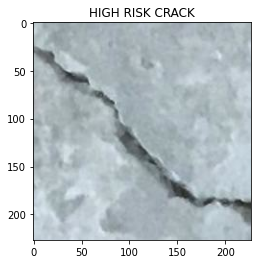

Crack Severity : High 



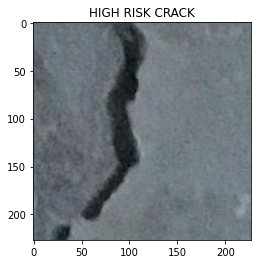

Crack Severity : High 



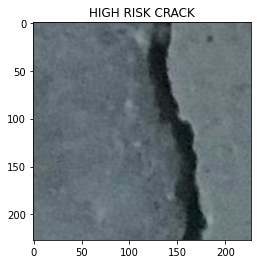

Crack Severity : High 



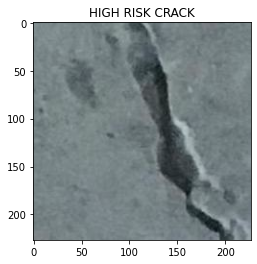

Crack Severity : High 



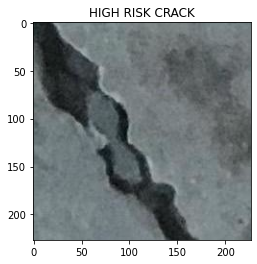

Crack Severity : High 



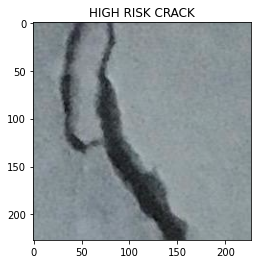

Crack Severity : High 



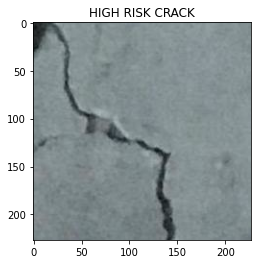

Crack Severity : High 



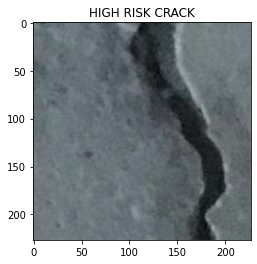

Crack Severity : High 



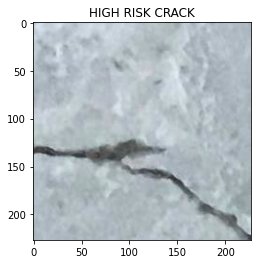

Crack Severity : High 



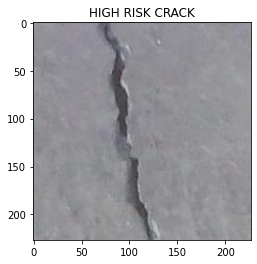

Crack Severity : High 



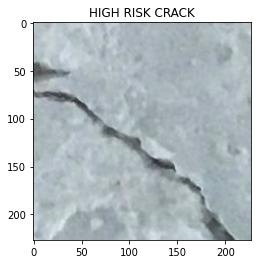

Crack Severity : High 



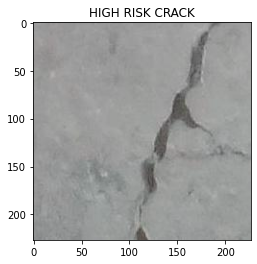

Crack Severity : High 



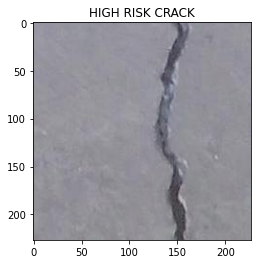

Crack Severity : High 



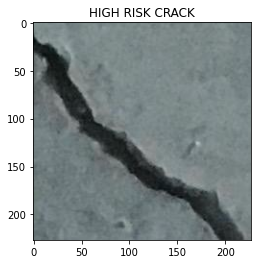

Crack Severity : High 



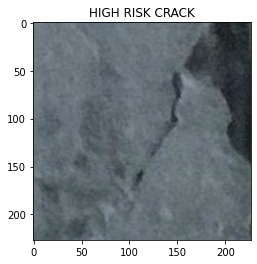

Crack Severity : High 



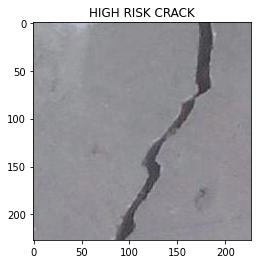

Crack Severity : High 



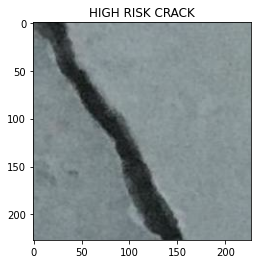

Crack Severity : High 



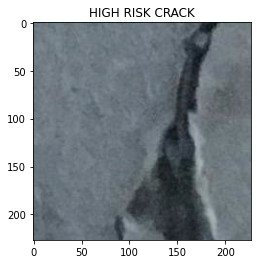

Crack Severity : High 



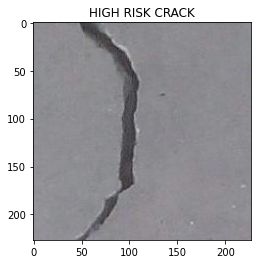

Crack Severity : Medium 



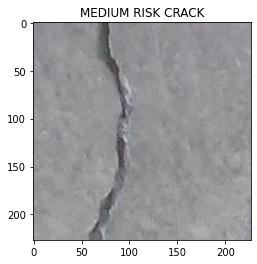

Crack Severity : High 



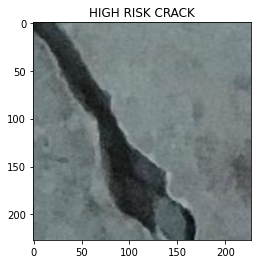

Crack Severity : High 



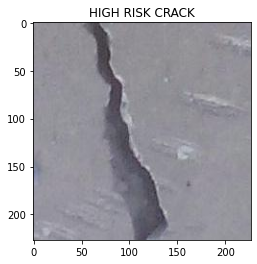

Crack Severity : High 



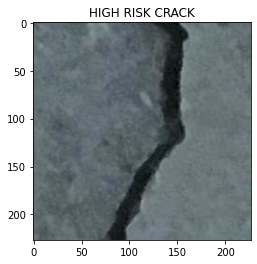

Crack Severity : High 



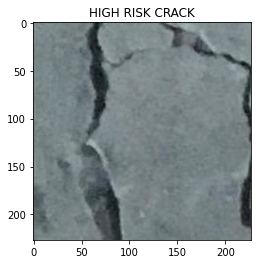

Crack Severity : High 



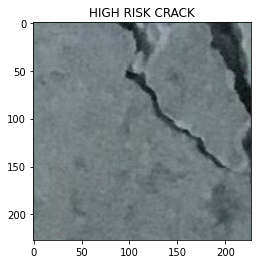

Crack Severity : High 



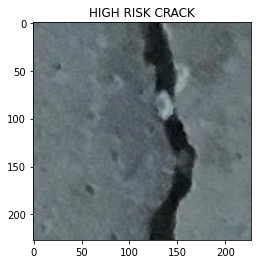

Crack Severity : High 



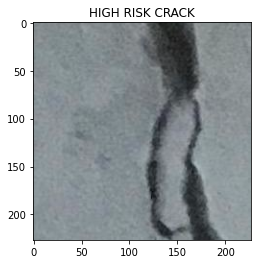

Crack Severity : High 



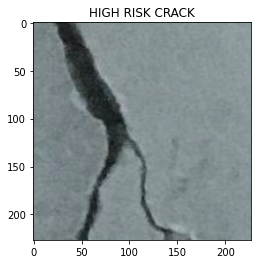

Crack Severity : Medium 



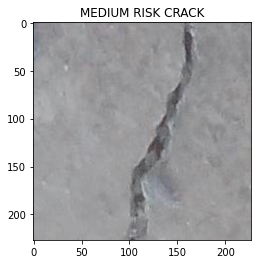

Crack Severity : High 



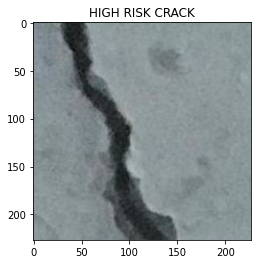

Crack Severity : High 



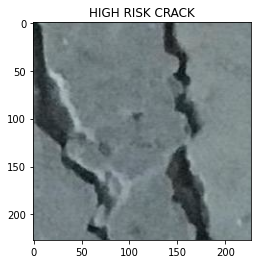

In [ ]:
dx_dir_right = [-5,-5,-5,-4,-3,-2,-1,0,1,2,3,4,5,5]
dy_dir_right = [0,1,2,3,4,5,5,5,5,5,4,3,2,1]

dx_dir_left = [5,5,5,4,3,2,1,0,-1,-2,-3,-4,-5,-5]
dy_dir_left = [0,-1,-2,-3,-4,-5,-5,-5,-5,-5,-4,-3,-2,-1]

dx_bfs = [-1,-1,0,1,1,1,0,-1]
dy_bfs = [0,1,1,1,0,-1,-1,-1]

save_result = []
save_risk = []
img_number=0
# BFS
# Searching the skeleton through BFS.
for k in range(0,len(skeleton_frames_Pw)):
    start = [0,0]
    next = []
    q = queue.Queue()
    q.put(start)

    len_x = skeleton_frames_Pw[k].shape[0]
    len_y = skeleton_frames_Pw[k].shape[1]

    visit = np.zeros((len_x,len_y))
    crack_width_list = []

    while(q.empty() == 0):
        next = q.get()
        x = next[0]
        y = next[1]
        right_x = right_y = left_x = left_y = -1

        if(skeleton_frames_Pw[k][x][y] == 255):
            # Skeleton
            # Estimating the direction of the crack from skeleton
            for i in range(0, len(dx_dir_right)):
                right_x = x + dx_dir_right[i]
                right_y = y + dy_dir_right[i]
                if(right_x<0 or right_y<0 or right_x>=len_x or right_y>=len_y): 
                    right_x = right_y = -1
                    continue;
                if(skeleton_frames_Pw[k][right_x][right_y] == 255): break;
                if(i==13): right_x = right_y = -1

            if(right_x == -1): 
                right_x = x
                right_y = y

            for i in range(0, len(dx_dir_left)):
                left_x = x + dx_dir_left[i]
                left_y = y + dy_dir_left[i]
                if(left_x <0 or left_y<0 or left_x >=len_x or left_y>=len_y): 
                    left_x = left_y = -1
                    continue;
                if(skeleton_frames_Pw[k][left_x][left_y] == 255): break;
                if(i==13): left_x = left_y = -1

            if(left_x == -1): 
                left_x = x
                left_y = y

            base = right_y - left_y
            height = right_x - left_x
            hypotenuse = math.sqrt(base*base + height*height)

            if(base==0 and height != 0): theta = 90.0
            elif(base==0 and height == 0): continue
            else: theta = math.degrees(math.acos((base * base + hypotenuse * hypotenuse - height * height)/(2.0 * base * hypotenuse)))

            theta += 90
            dist = 0
            
            # Calculate the distance if the perpendicular line meets the edge of the crack.
            for i in range(0,2):
                
                pix_x = x
                pix_y = y
                if(theta>360): theta -= 360
                elif(theta<0): theta += 360    
                
                if(theta == 0.0 or theta == 360.0):
                    while(1):
                        pix_y+=1
                        if(pix_y>=len_y):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[k][pix_x][pix_y]==255): break;

                elif(theta == 90.0):
                    while(1):
                        pix_x-=1
                        if(pix_x<0):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[k][pix_x][pix_y]==255): break;

                elif(theta == 180.0):
                    while(1):
                        pix_y-=1
                        if(pix_y<0):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[k][pix_x][pix_y]==255): break;

                elif(theta == 270.0):
                    while(1):
                        pix_x+=1
                        if(pix_x>=len_x):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[k][pix_x][pix_y]==255): break;
                else:
                    a = 1
                    radian = math.radians(theta)
                    while(1):        
                        pix_x = x - round(a*math.sin(radian))
                        pix_y = y + round(a*math.cos(radian))
                        if(pix_x<0 or pix_y<0 or pix_x>=len_x or pix_y>=len_y): 
                            pix_x=x
                            pix_y=y
                            break;
                        if(edges_frames_Pw[k][pix_x][pix_y]==255): break;

                        if(theta>0 and theta<90):
                            if(pix_y+1<len_y and edges_frames_Pw[k][pix_x][pix_y+1]==255): 
                                pix_y+=1
                                break;
                            if(pix_x-1>=0 and edges_frames_Pw[k][pix_x-1][pix_y]==255): 
                                pix_x-=1
                                break;

                        elif(theta>90 and theta<180):
                            if(pix_y-1>=0 and edges_frames_Pw[k][pix_x][pix_y-1]==255): 
                                pix_y-=1
                                break;
                            if(pix_x-1>=0 and edges_frames_Pw[k][pix_x-1][pix_y]==255): 
                                pix_x-=1
                                break;

                        elif(theta>180 and theta<270):
                            if(pix_y-1>=0 and edges_frames_Pw[k][pix_x][pix_y-1]==255): 
                                pix_y-=1
                                break;
                            if(pix_x+1<len_x and edges_frames_Pw[k][pix_x+1][pix_y]==255): 
                                pix_x+=1
                                break;         

                        elif(theta>270 and theta<360): 
                            if(pix_y+1<len_y and edges_frames_Pw[k][pix_x][pix_y+1]==255): 
                                pix_y+=1
                                break;
                            if(pix_x+1<len_x and edges_frames_Pw[k][pix_x+1][pix_y]==255): 
                                pix_x+=1
                                break;
                        a+=1
        
                dist += math.sqrt((y-pix_y)**2 + (x-pix_x)**2)
                theta += 180        

            # The list which saves the width of the crack.
            crack_width_list.append(dist)
            
        for i in range(0,8):
            next_x = x + dx_bfs[i]
            next_y = y + dy_bfs[i]

            if(next_x<0 or next_y<0 or next_x>=len_x or next_y>=len_y): continue;
            if(visit[next_x][next_y] == 0): 
                q.put([next_x,next_y])
                visit[next_x][next_y] = 1
                
    crack_width_list.sort(reverse=True)
    if(len(crack_width_list)==0): 
        save_result.append(0)
        real_width = 0
    elif(len(crack_width_list)<10):
        real_width = round(crack_width_list[len(crack_width_list)-1], 2)
        save_result.append(real_width)
    else: 
        real_width = round(crack_width_list[9], 2)
        save_result.append(real_width)
    # give level of risk data in save_risk
    if(real_width >= 15.5):
        save_risk.append('HIGH')
        print('Crack Severity : High \n')
        #cv2.imwrite("C:/Users/sonic/Downloads/all noises/CLASSIFICATION/HIGH/img"+str(img_number)+".jpg",im_list[img_number])
        plt.imshow(im_list[img_number])
        plt.title('HIGH RISK CRACK')
        plt.show()
        img_number +=1
    elif(real_width<15.5 and real_width>=4.2): 
        save_risk.append('MEDIUM')
        print('Crack Severity : Medium \n')
        #cv2.imwrite("C:/Users/sonic/Downloads/all noises/CLASSIFICATION/MEDIUM/img"+str(img_number)+".jpg",im_list[img_number])
        plt.imshow(im_list[img_number])
        plt.title('MEDIUM RISK CRACK')
        plt.show()
        img_number +=1
    else: 
        save_risk.append('LOW')
        print('Crack Severity : Low \n')
        #cv2.imwrite("C:/Users/sonic/Downloads/all noises/CLASSIFICATION/LOW/img"+str(img_number)+".jpg",im_list[img_number])
        plt.imshow(im_list[img_number])
        plt.title('LOW RISK CRACK')
        plt.show()
        img_number +=1
